In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas.util.testing as tm

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Location

In [2]:
data = pd.read_csv('/content/sample_data/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#Simple Linear Regression

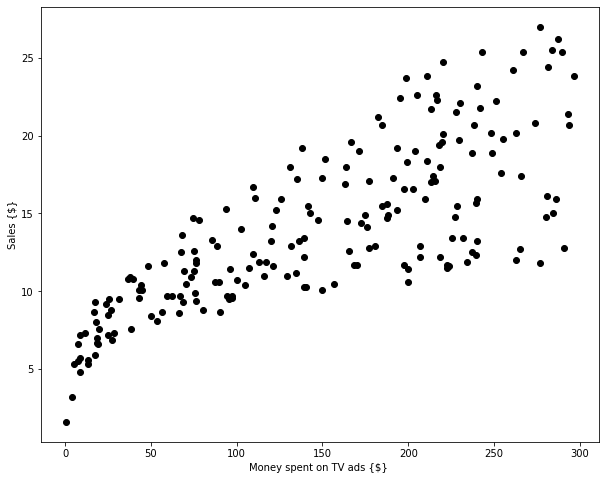

In [3]:
plt.figure(figsize=(10,8))
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel('Money spent on TV ads {$} ')
plt.ylabel('Sales {$}')
plt.show()

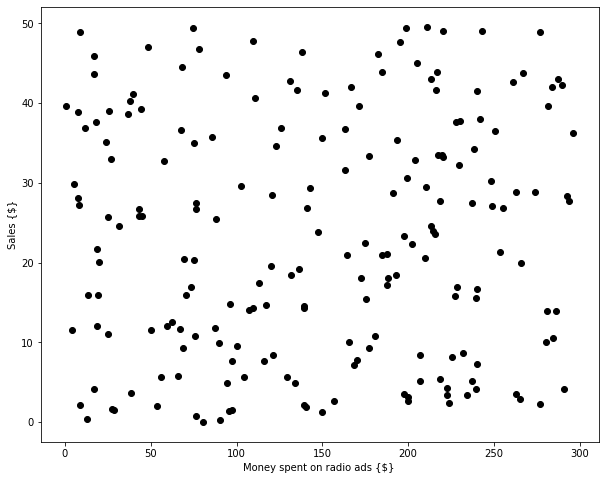

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(data['TV'], data['radio'], c='black')
plt.xlabel('Money spent on radio ads {$} ')
plt.ylabel('Sales {$}')
plt.show()

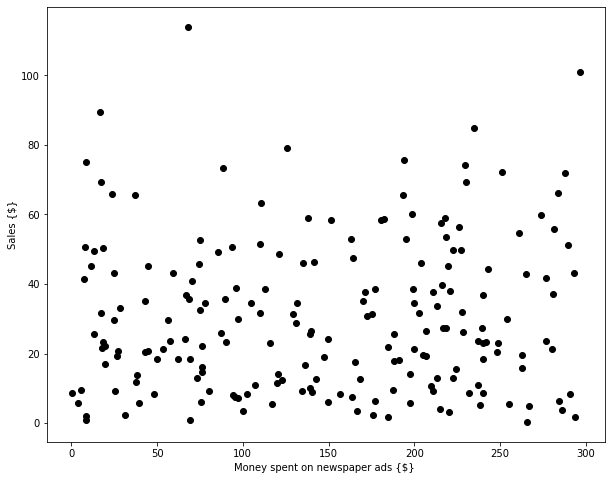

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(data['TV'], data['newspaper'], c='black')
plt.xlabel('Money spent on newspaper ads {$} ')
plt.ylabel('Sales {$}')
plt.show()

In [6]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

print(f"The Linear Model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The Linear Model is: 
 Y = 7.032593549127695 + 0.04753664043301975*TV


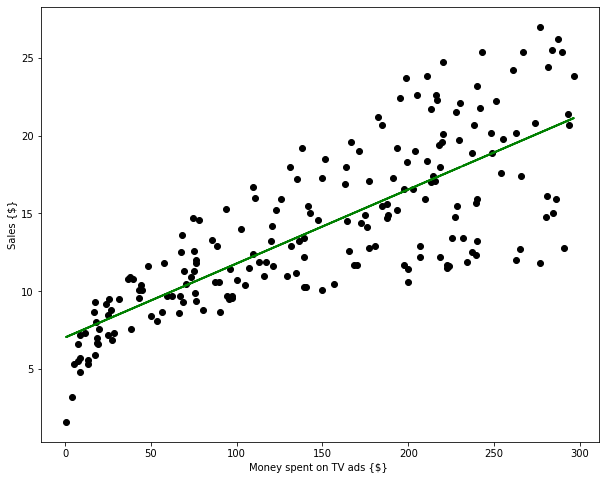

In [7]:
predictions = reg.predict(X)
plt.figure(figsize=(10,8))

plt.scatter(X, y , c='black')
plt.plot(X, predictions, c= 'green',linewidth = 2)
plt.xlabel('Money spent on TV ads {$} ')
plt.ylabel('Sales {$}')
plt.show()

In [8]:
X = data['TV']
y = data['sales']

exog = sm.add_constant(X)
est = sm.OLS(y , exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           1.47e-42
Time:                        21:15:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

#Multiple Linear Regression

In [9]:
Xs = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

print(f'The Model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper')

The Model is: 
 Y = 3.005209420097845 + -0.0005798278087352421*TV + 0.04577591959744518*radio + 0.18838317597693344*newspaper


In [10]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
ext = sm.OLS(y, exog).fit()

print(est.summary())



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           1.47e-42
Time:                        21:15:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0